In [2]:
#Leitura de dados
import pandas as pd 

#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

#Trnsformação dos dados
from sklearn.preprocessing import StandardScaler

#Algorítimo a ser usado para o cluster dos clientes
from sklearn.cluster import KMeans

#Metodo para avaliação do cluster
from sklearn.metrics import silhouette_score



In [3]:
df = pd.read_csv("../Dados/Customer Data.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Aqui vemos que há valores faltantes, vamos investigar se há um padrão ou eles são valores aleatórios e podem ser removidos!

In [5]:
dfNan = df[df['MINIMUM_PAYMENTS'].isna()]
dfNan.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,0.0,313.0,313.000000
mean,555.441321,0.389403,393.087284,250.433387,142.653898,559.136698,0.336043,0.107886,0.244670,0.067169,1.460064,5.833866,3731.789137,322.286168,NaN,0.0,11.063898
std,1292.687887,0.408341,757.905701,624.453991,311.289043,1185.132567,0.372517,0.227370,0.359756,0.130087,3.182359,9.600908,2924.606153,1996.658905,NaN,0.0,1.869734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,NaN,0.0,6.000000
25%,0.187069,0.090909,1.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,0.000000,NaN,0.0,12.000000
50%,16.848358,0.181818,130.400000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,3000.000000,0.000000,NaN,0.0,12.000000
75%,286.686616,1.000000,399.950000,176.030000,152.280000,480.104401,0.583333,0.083333,0.416667,0.083333,1.000000,8.000000,5000.000000,0.000000,NaN,0.0,12.000000
max,9164.724752,1.000000,7597.090000,6761.290000,2959.240000,7616.064965,1.000000,1.000000,1.000000,1.000000,21.000000,77.000000,19500.000000,29272.486070,NaN,0.0,12.000000


In [6]:
dfSemNan = df[~df['MINIMUM_PAYMENTS'].isna()]
dfSemNan.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8636.000000,8637.000000,8637.000000,8637.000000,8637.00000
mean,1601.041632,0.894951,1025.315149,604.831402,420.794807,994.082050,0.495943,0.205885,0.368778,0.137608,3.313651,15.031492,4522.091030,1784.272537,864.206542,0.159285,11.53375
std,2095.519182,0.207833,2167.010602,1684.222861,917.203254,2121.353259,0.401285,0.300044,0.398090,0.201780,6.912151,25.179530,3659.240379,2909.704331,2372.446607,0.296259,1.31226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.00000
25%,147.838347,0.909091,43.300000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.446951,169.123707,0.000000,12.00000
50%,916.749476,1.000000,375.240000,44.990000,94.710000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.300688,312.343947,0.000000,12.00000
75%,2104.961701,1.000000,1145.850000,598.950000,484.040000,1131.986387,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.116757,825.485459,0.166667,12.00000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.00000


Analisando os dados dos describes, oa dados de com nan são dados com médias menores, e não apresentam um padrão já que existe outliers neles, logo como 313 valores não vai afetar na análise final pois só representam 3,14% dos dados, irei remove-los até porque os dados presentes neles tamém existe exemplos semelhantes nos dados sem nan!

In [7]:
dfSemNan = df.dropna()
dfSemNan.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Agora irei analisar os outliers presentes na base de dados, mas antes irei  remover a coluna de CUST_ID pois, não irá nos auxiliar em nada na criação dos clusters

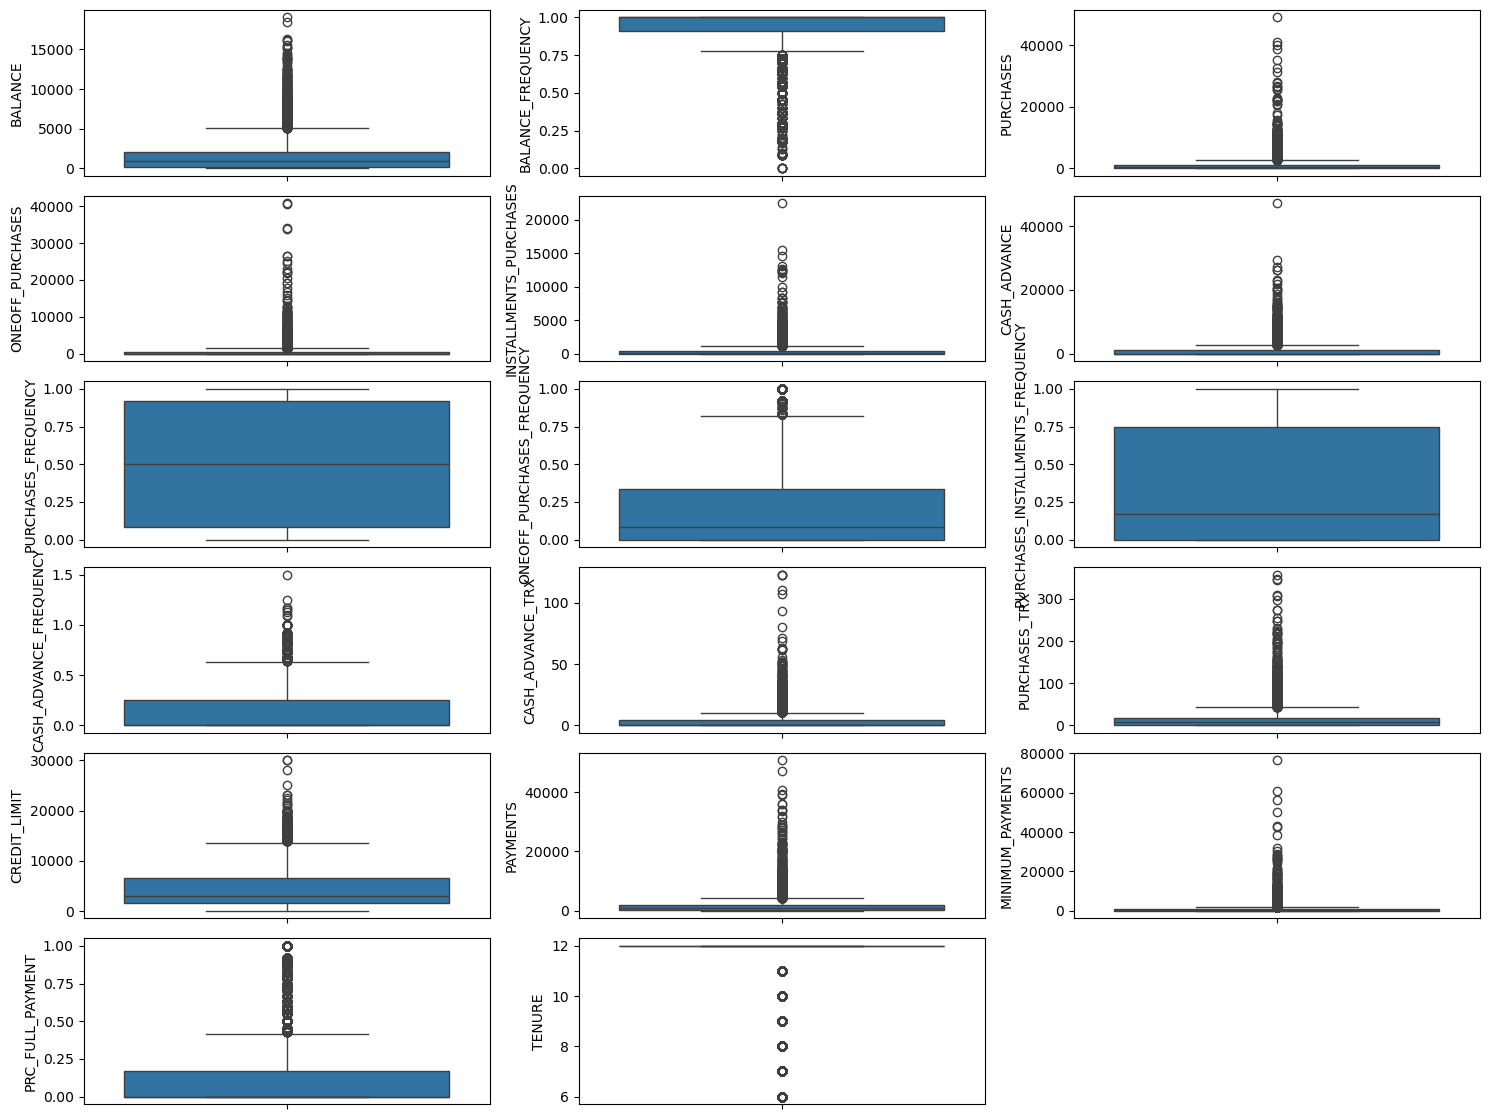

In [8]:
dfSemNan = dfSemNan.drop("CUST_ID", axis= 1)

colunasNumericas = dfSemNan.select_dtypes(include="number").columns
numeroCols = len(colunasNumericas)
numeroLinhas = (numeroCols + 2)/3

plt.figure(figsize=[15, 5 * numeroLinhas])
for i, coluna in enumerate(colunasNumericas):
    plt.subplot(numeroCols, 3, i+1)
    sns.boxplot(dfSemNan[coluna])
plt.tight_layout()
plt.show()

Os outliers neste projeto representam clientes reais e valiosos: grandes gastadores, usuários frequentes de crédito e perfis extremos que são justamente os mais importantes para estratégias personalizadas. Removê-los simplificaria a análise, mas apagaria insights cruciais. Por isso decidi mante-los, agora irei analisar como está a distribuição dos dados!

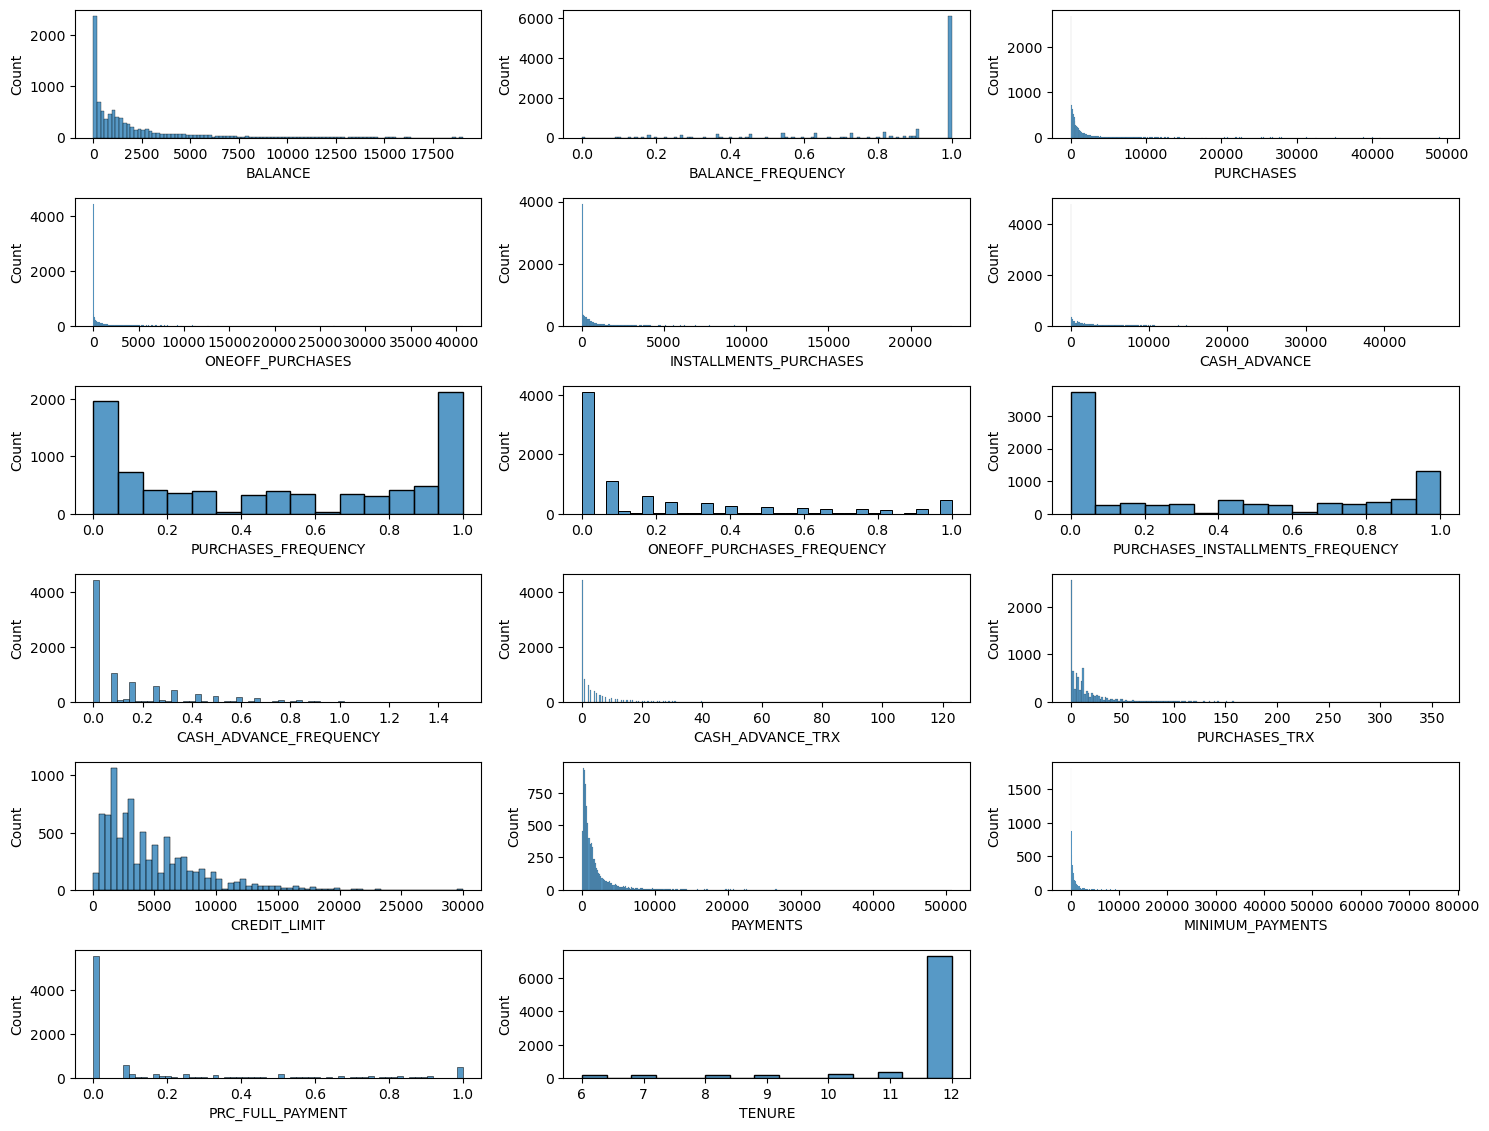

In [9]:

colunasNumericas = dfSemNan.select_dtypes(include="number").columns
numeroCols = len(colunasNumericas)
numeroLinhas = (numeroCols + 2)/3

plt.figure(figsize=[15, 5 * numeroLinhas])
for i, coluna in enumerate(colunasNumericas):
    plt.subplot(numeroCols, 3, i+1)
    sns.histplot(dfSemNan[coluna])
plt.tight_layout()
plt.show()

Ao analisar as variáveis, percebe-se que a maioria dos dados apresenta uma assimetria à direita, o que já era esperado pelos outliers observados nos boxplots. A partir dessa análise, é possível identificar uma divisão clara entre os diferentes perfis de clientes para cada variável. Abaixo, apresento os principais insights:

* **Balance (Saldo):**
  Existe uma divisão evidente entre dois grupos de clientes: um com um perfil mais comum, que mantém pouco dinheiro na conta, e outro com valores acima da média, sugerindo clientes premium.

* **Balance Frequency (Frequência do Saldo):**
  A maioria dos clientes atualiza frequentemente o saldo, indicando alta atividade na conta. No entanto, há clientes com baixa frequência de atualização, possivelmente caracterizando clientes menos ativos ou com baixa rotatividade na conta.

* **Purchases (Compras):**
  No total de compras realizadas nos últimos 6 meses (período abrangido pelos dados), nota-se que a maioria dos clientes faz compras de valores menores. Contudo, há uma classe de clientes que realiza compras com valores muito elevados, indicando clientes mais valiosos e bem-sucedidos.

* **One-off Purchases (Compras à Vista):**
  As compras realizadas sem parcelamento mostram dois padrões distintos: um grupo com valores mais baixos (comportamento comum) e outro com valores muito altos, reforçando a separação entre clientes com altos gastos e aqueles com gastos menores.

* **Installment Purchases (Compras Parceladas):**
  A maior parte das compras parceladas envolve valores mais baixos, mas também existem casos de compras parceladas com valores significativamente elevados.

* **Cash Advance (Adiantamento de Dinheiro):**
  A maioria dos clientes realiza retiradas de valores menores via cartão de crédito. Contudo, há clientes que retiram valores muito elevados, provavelmente aqueles com maior limite de crédito.

* **PRC Full Payment (Percentual de Pagamento Completo):**
  Observa-se que a maioria dos clientes não realizou o pagamento completo das parcelas nos últimos 6 meses. Alguns apresentam uma frequência moderada de pagamentos completos, enquanto outros quitaram integralmente suas dívidas. No entanto, a maioria não fez o pagamento total.

* **Purchases TRX (Transações de Compras):**
  No período de 6 meses, há clientes que realizaram poucas compras, enquanto outros apresentaram uma quantidade significativa de transações, indicando potenciais clientes estratégicos para o banco.

Agora ireia analiar a correlação dos dados para ver se acho padrôes interessantes!

In [ ]:
dfCorr = dfSemNan.corr()



In [10]:
transformadorDados = StandardScaler()
dfTransformado = transformadorDados.fit_transform(dfSemNan)
dfCluster = pd.DataFrame(dfTransformado, columns = dfSemNan.columns)
dfCluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


Agora, após a tranformações dos dados vou começar a implementação do modelo para o cluster dos clientes, mas antes irei analisar quantos cluster será preciso para a base de dados e após isso irei começar a analise dos cluster, primeiro irei começar com a analise de cotovelo(Calcula a inércia)

1 69890.56401968577
2 48264.909655954696
3 31917.76324173629
4 23720.184900634722
5 18760.520139603428
6 15691.700783968163
7 14079.88251106447
8 12088.909606789863
9 10754.078290536801
10 9558.140969074473


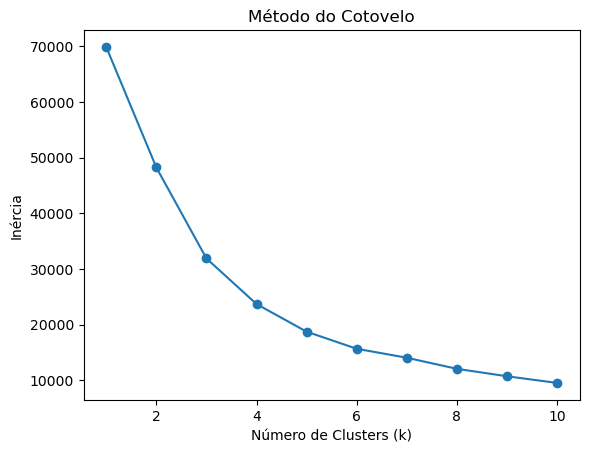

In [11]:
from sklearn.decomposition import PCA

# Escolha o número de componentes para reter +90% da variância
pca = PCA(n_components=2) 
dfPCA = pca.fit_transform(dfCluster)#Componentes necessários
dfPCA = pd.DataFrame(dfPCA, columns=["PCA1", "PCA2"])#Base de dados que será usada para os testes de validação de cluster

inertias = []
K_range = range(1, 11)  # Testa de 1 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dfPCA)  # Substitua pelos seus dados escalados
    inertias.append(kmeans.inertia_)
    print(k, kmeans.inertia_)

# Plot
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

De acordo com o gráfico, o cluster mais indicado é o 4 já que é apartir dele que as diferenças para de diminuir o que implica que ele já consegue explicar muito bem os dados! Vamos partir para a vizualização para vermos esses clusters!

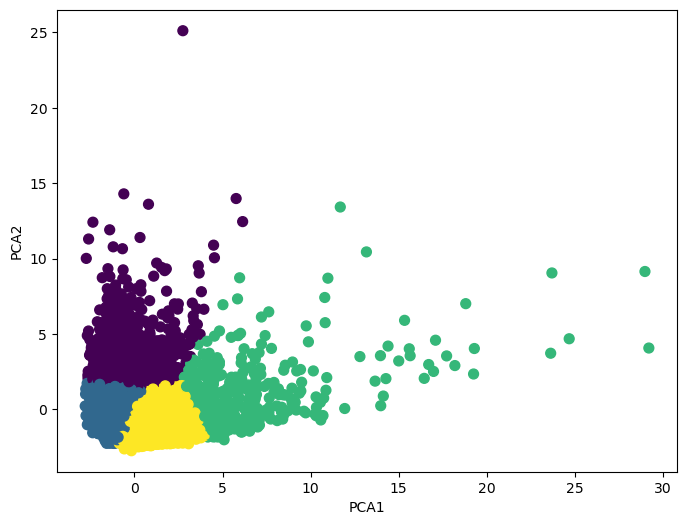

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeansLabels = kmeans.fit_predict(dfPCA[["PCA1", "PCA2"]])
dfPCA['Cluster'] = kmeansLabels
plt.figure(figsize=(8, 6))
plt.scatter(dfPCA["PCA1"], dfPCA["PCA2"], c=dfPCA["Cluster"], cmap="viridis", s=50)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()